In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Loading dataset

In [2]:
company_sym = "LT.csv";

dataset = pd.read_csv(company_sym)
dataset

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2004-06-23,LT,EQ,2.00,500.0,745.00,150.00,638.00,635.95,627.71,2699293,1.694372e+14,NaN,395612,0.1466
1,2004-06-24,LT,EQ,635.95,630.0,630.00,608.40,612.00,616.00,618.21,913575,5.647802e+13,NaN,305751,0.3347
2,2004-06-25,LT,EQ,616.00,619.0,679.00,616.10,665.00,668.30,658.45,1637383,1.078136e+14,NaN,217950,0.1331
3,2004-06-28,LT,EQ,668.30,660.0,671.90,640.20,653.00,656.40,657.39,913349,6.004271e+13,NaN,194984,0.2135
4,2004-06-29,LT,EQ,656.40,656.0,683.40,653.00,666.85,671.70,675.11,743063,5.016488e+13,NaN,101786,0.1370
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4077,2020-11-23,LT,EQ,1132.30,1138.8,1147.85,1122.85,1125.10,1125.85,1132.87,4998877,5.663065e+14,117426.0,2145194,0.4291
4078,2020-11-24,LT,EQ,1125.85,1135.0,1144.00,1128.30,1137.00,1135.50,1135.80,4623887,5.251822e+14,127581.0,2134296,0.4616
4079,2020-11-25,LT,EQ,1135.50,1141.5,1147.80,1112.45,1117.20,1116.00,1124.96,4651911,5.233236e+14,122884.0,1515634,0.3258
4080,2020-11-26,LT,EQ,1116.00,1130.0,1134.95,1101.55,1119.20,1118.85,1116.91,7360928,8.221465e+14,153742.0,3010531,0.4090


In [3]:
dataset.isnull().sum()

Date                     0
Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                1728
Deliverable Volume       0
%Deliverble              0
dtype: int64

In [4]:
dataset.dropna(inplace=True)
dataset

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
1728,2011-06-01,LT,EQ,1642.35,1642.00,1689.00,1641.55,1686.40,1684.95,1672.76,1875422,3.137129e+14,110884.0,835150,0.4453
1729,2011-06-02,LT,EQ,1684.95,1665.20,1677.75,1654.25,1674.20,1672.10,1666.21,1433110,2.387863e+14,54940.0,770133,0.5374
1730,2011-06-03,LT,EQ,1672.10,1681.00,1719.70,1680.50,1714.35,1712.75,1705.57,2771995,4.727834e+14,83507.0,1672339,0.6033
1731,2011-06-06,LT,EQ,1712.75,1700.00,1736.05,1699.10,1726.00,1727.80,1719.47,1231355,2.117274e+14,59907.0,478964,0.3890
1732,2011-06-07,LT,EQ,1727.80,1721.45,1726.40,1697.50,1706.00,1705.60,1708.21,1245656,2.127836e+14,51705.0,617338,0.4956
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4077,2020-11-23,LT,EQ,1132.30,1138.80,1147.85,1122.85,1125.10,1125.85,1132.87,4998877,5.663065e+14,117426.0,2145194,0.4291
4078,2020-11-24,LT,EQ,1125.85,1135.00,1144.00,1128.30,1137.00,1135.50,1135.80,4623887,5.251822e+14,127581.0,2134296,0.4616
4079,2020-11-25,LT,EQ,1135.50,1141.50,1147.80,1112.45,1117.20,1116.00,1124.96,4651911,5.233236e+14,122884.0,1515634,0.3258
4080,2020-11-26,LT,EQ,1116.00,1130.00,1134.95,1101.55,1119.20,1118.85,1116.91,7360928,8.221465e+14,153742.0,3010531,0.4090


In [5]:
dataset.columns

Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble'],
      dtype='object')

In [6]:
to_drop = ['Date', 'Symbol', 'Series']
dataset = dataset.drop(columns = to_drop)
dataset

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
1728,1642.35,1642.00,1689.00,1641.55,1686.40,1684.95,1672.76,1875422,3.137129e+14,110884.0,835150,0.4453
1729,1684.95,1665.20,1677.75,1654.25,1674.20,1672.10,1666.21,1433110,2.387863e+14,54940.0,770133,0.5374
1730,1672.10,1681.00,1719.70,1680.50,1714.35,1712.75,1705.57,2771995,4.727834e+14,83507.0,1672339,0.6033
1731,1712.75,1700.00,1736.05,1699.10,1726.00,1727.80,1719.47,1231355,2.117274e+14,59907.0,478964,0.3890
1732,1727.80,1721.45,1726.40,1697.50,1706.00,1705.60,1708.21,1245656,2.127836e+14,51705.0,617338,0.4956
...,...,...,...,...,...,...,...,...,...,...,...,...
4077,1132.30,1138.80,1147.85,1122.85,1125.10,1125.85,1132.87,4998877,5.663065e+14,117426.0,2145194,0.4291
4078,1125.85,1135.00,1144.00,1128.30,1137.00,1135.50,1135.80,4623887,5.251822e+14,127581.0,2134296,0.4616
4079,1135.50,1141.50,1147.80,1112.45,1117.20,1116.00,1124.96,4651911,5.233236e+14,122884.0,1515634,0.3258
4080,1116.00,1130.00,1134.95,1101.55,1119.20,1118.85,1116.91,7360928,8.221465e+14,153742.0,3010531,0.4090


## input features and target values

In [7]:
dataset.columns

Index(['Prev Close', 'Open', 'High', 'Low', 'Last', 'Close', 'VWAP', 'Volume',
       'Turnover', 'Trades', 'Deliverable Volume', '%Deliverble'],
      dtype='object')

In [8]:
tar_col = ['VWAP']
Y = dataset[tar_col]
Y

,VWAP
1728,1672.76
1729,1666.21
1730,1705.57
1731,1719.47
1732,1708.21
...,...
4077,1132.87
4078,1135.80
4079,1124.96
4080,1116.91


In [9]:
X = dataset.drop(columns = tar_col)
X

,Prev Close,Open,High,Low,Last,Close,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
1728,1642.35,1642.00,1689.00,1641.55,1686.40,1684.95,1875422,3.137129e+14,110884.0,835150,0.4453
1729,1684.95,1665.20,1677.75,1654.25,1674.20,1672.10,1433110,2.387863e+14,54940.0,770133,0.5374
1730,1672.10,1681.00,1719.70,1680.50,1714.35,1712.75,2771995,4.727834e+14,83507.0,1672339,0.6033
1731,1712.75,1700.00,1736.05,1699.10,1726.00,1727.80,1231355,2.117274e+14,59907.0,478964,0.3890
1732,1727.80,1721.45,1726.40,1697.50,1706.00,1705.60,1245656,2.127836e+14,51705.0,617338,0.4956
...,...,...,...,...,...,...,...,...,...,...,...
4077,1132.30,1138.80,1147.85,1122.85,1125.10,1125.85,4998877,5.663065e+14,117426.0,2145194,0.4291
4078,1125.85,1135.00,1144.00,1128.30,1137.00,1135.50,4623887,5.251822e+14,127581.0,2134296,0.4616
4079,1135.50,1141.50,1147.80,1112.45,1117.20,1116.00,4651911,5.233236e+14,122884.0,1515634,0.3258
4080,1116.00,1130.00,1134.95,1101.55,1119.20,1118.85,7360928,8.221465e+14,153742.0,3010531,0.4090


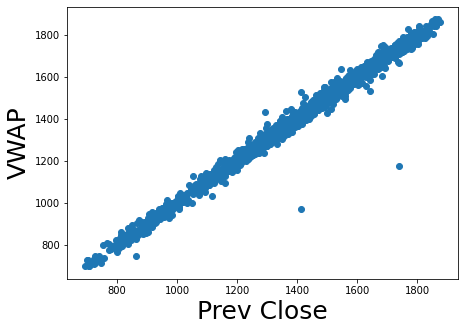

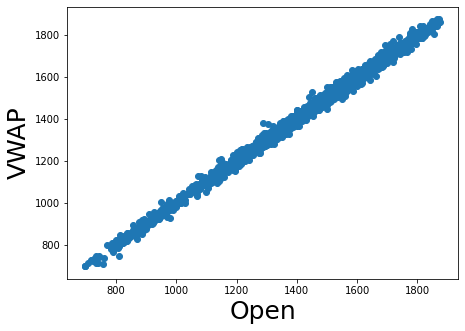

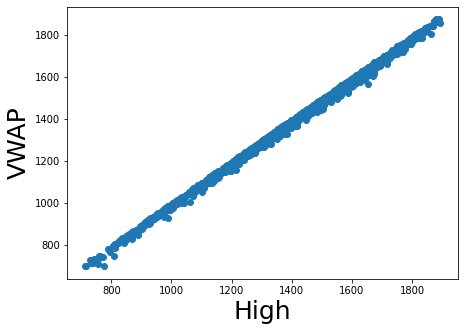

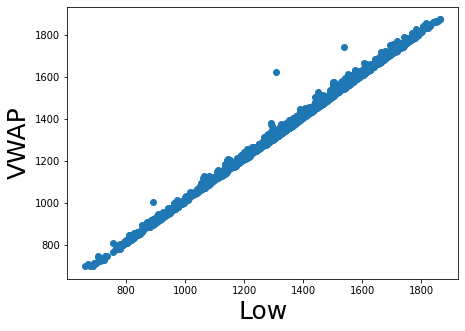

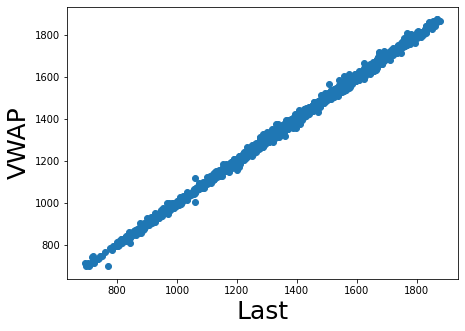

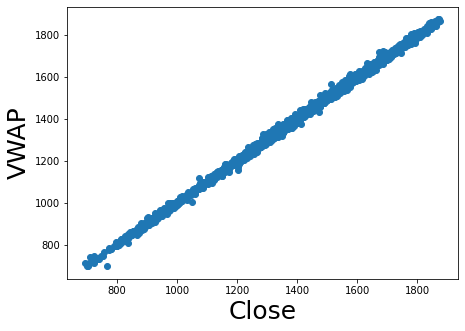

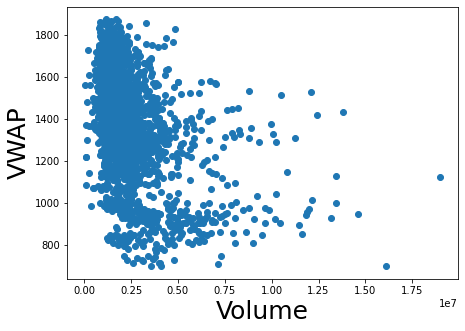

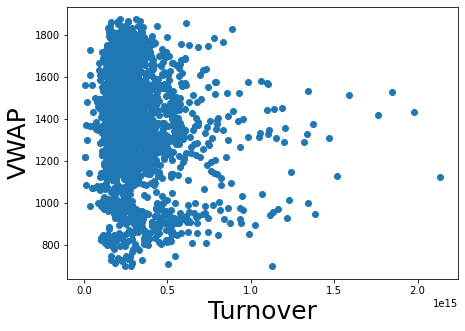

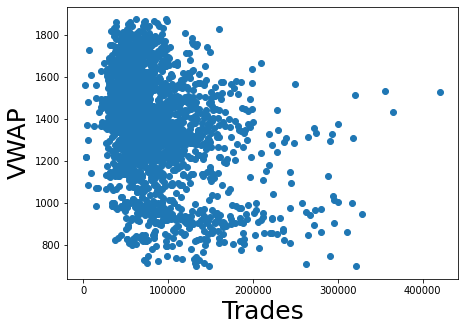

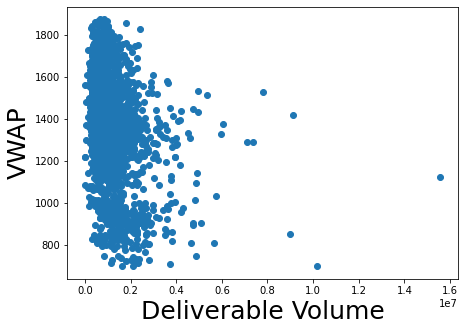

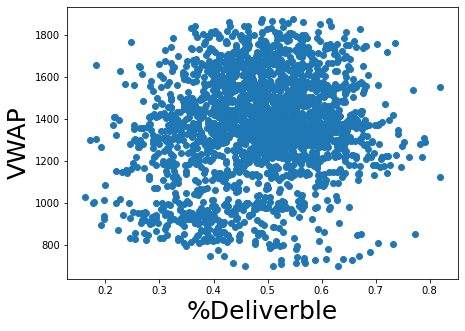

In [10]:
for feature_name in X:
    plt.figure(figsize=(7,5))
    plt.tight_layout()
    plt.scatter(X[feature_name], Y)
    plt.ylabel(tar_col[0],size = 25)
    plt.xlabel(feature_name, size = 25)
    plt.show()

In [11]:
X = np.array(X)
#X
X.shape

(2354, 11)

In [12]:
Y = np.array(Y)
#Y
Y.shape

(2354, 1)

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.15, random_state=1)

In [14]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_val = sc.fit_transform(X_val)

# NN tensorflow model

In [15]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [16]:
input_dimensions = X_train.shape[1]
input_dimensions

11

### Neutral Network Model
**1024 neurons in 1st layer**

**512 neurons in 2nd layer**

**1 neurons as output**


In [17]:
model = keras.Sequential([
        keras.layers.Dense(input_dimensions, input_dim=input_dimensions, kernel_initializer='normal', activation='relu'),
        keras.layers.Dense(1024, activation='relu'),
        keras.layers.Dense(512, activation='relu'),
        keras.layers.Dense(1, activation='linear')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 11)                132       
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              12288     
_________________________________________________________________
dense_2 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 513       
Total params: 537,733
Trainable params: 537,733
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])
history=model.fit(X_train, y_train, epochs=75, batch_size=32, verbose=1, validation_split=0.2)
predictions = model.predict(X_val)

Epoch 1/75
50/50 [==============================] - 2s 21ms/step - loss: 1872924.7990 - mse: 1872924.7990 - mae: 1346.2201 - val_loss: 1021492.3125 - val_mse: 1021492.3125 - val_mae: 955.4240
Epoch 2/75
50/50 [==============================] - 1s 14ms/step - loss: 627623.8891 - mse: 627623.8891 - mae: 711.9911 - val_loss: 168192.7344 - val_mse: 168192.7344 - val_mae: 351.2603
Epoch 3/75
50/50 [==============================] - 1s 13ms/step - loss: 141264.9387 - mse: 141264.9387 - mae: 318.0004 - val_loss: 71001.3984 - val_mse: 71001.3984 - val_mae: 212.6453
Epoch 4/75
50/50 [==============================] - 1s 15ms/step - loss: 66207.0125 - mse: 66207.0125 - mae: 205.1695 - val_loss: 40080.3516 - val_mse: 40080.3516 - val_mae: 152.5402
Epoch 5/75
50/50 [==============================] - 1s 13ms/step - loss: 32408.5437 - mse: 32408.5437 - mae: 139.5112 - val_loss: 24084.3984 - val_mse: 24084.3984 - val_mae: 116.4551
Epoch 6/75
50/50 [==============================] - 1s 15ms/step - los

dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])


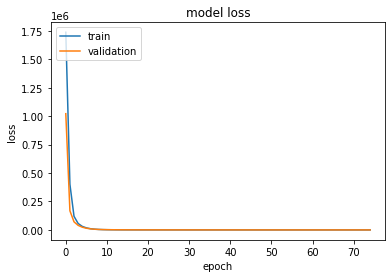

In [19]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [20]:
predictions

array([[1231.866  ],
       [1627.9785 ],
       [1400.2234 ],
       [1571.7751 ],
       [ 873.7483 ],
       [ 908.7221 ],
       [1339.1866 ],
       [1203.6064 ],
       [1646.117  ],
       [1401.736  ],
       [1511.4397 ],
       [1479.7311 ],
       [ 965.01196],
       [1448.4249 ],
       [1636.7161 ],
       [1484.1804 ],
       [1444.9167 ],
       [1151.721  ],
       [ 851.6317 ],
       [ 962.45166],
       [1365.1116 ],
       [ 819.8252 ],
       [1266.4116 ],
       [1391.6602 ],
       [1539.3658 ],
       [1343.5544 ],
       [1583.4747 ],
       [1740.5228 ],
       [1369.3184 ],
       [1665.7671 ],
       [1346.2456 ],
       [1332.1287 ],
       [1731.8944 ],
       [1697.7637 ],
       [1298.1735 ],
       [1735.377  ],
       [1193.7567 ],
       [1066.6035 ],
       [ 915.11426],
       [1225.2502 ],
       [1166.7251 ],
       [1699.421  ],
       [1718.3115 ],
       [1318.5233 ],
       [1254.8767 ],
       [1350.7788 ],
       [1553.7351 ],
       [1345.

In [21]:
 btest = y_val
 bpred = predictions
 
 mean_absolute_error(btest, bpred)

8.511848820400783

We have got very low mean square error which showes that our model has trained well.

In [22]:
mean_squared_error(btest, bpred)

math.sqrt(mean_squared_error(btest, bpred))

12.68423351548988